In [1]:
import numpy as np 
import pandas as pd 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/CSV Data/mtsamples.csv')
pd.set_option('max_colwidth', 500)
data.head(5)


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time but then seemed to lose effectiveness. She has used Allegra also. She used that last summer and she began using it again two weeks ago. It does not appear to be working very well. She has used over-the-counter sprays but no prescription nasal...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at home and does cardio. He has difficulty walking two blocks or five flights of stairs. Difficulty with snoring. He has muscle and joint pains including knee pain, back pain, foot and ankle pain, and swelling. He has gastroesophageal reflux disease.,PAST SURGICAL HISTORY:, Includes reconstructive...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost"
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260. He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again. He wants to be able to exercise and play volleyball. Physically, he is sluggish. He gets tired quickly. He does not go out...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, gastric, bypass, heart, pounds, weight,"
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of 51%.,4. Normal LV diastolic function.,5. No pericardial effusion.,6. Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7. PA systolic pressure is 36 mmHg.,DOPPLER: , ,1. Mild mitral and tricuspid regurgitation.,2. Trace aortic and pulmonary regurgitation.","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation, systolic function, tricuspid, tricuspid valve, normal lv"
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. There is near-cavity obliteration seen. There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function. There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pr...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection

In [4]:
!pip install word2vec-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for word2vec-keras: filename=word2vec_keras-0.1-py3-none-any.whl size=6457 sha256=abce92c82d3404e56695a20b947e58655b94fa514b1353514795a323f3ea8821
  Stored in directory: /root/.cache/pip/wheels/0e/49/40/23ac8b35ff67c58f1a73d6efb954a260ff0950b40329f2ac48
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=45eff5ce022ed1388f29caaa7599556a10029c0693ad4056766635fbd8399a34
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built word2vec-keras sklearn


In [5]:
data.describe()


,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [7]:
data.medical_specialty.value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [8]:
data = data[['transcription', 'medical_specialty']]

print(len(data[data['transcription'].isna()]))
print("Before droping na values", data .shape)
data  = data.drop(data[data ['transcription'].isna()].index)
print("After droping na values", data.shape)

33
Before droping na values (4999, 2)
After droping na values (4966, 2)


In [9]:
data.transcription.duplicated(keep="first").value_counts()

True     2599
False    2367
Name: transcription, dtype: int64

In [10]:
data.drop_duplicates(subset="transcription",keep="first",inplace=True,ignore_index=True)
data.describe()

,transcription,medical_specialty
count,2367,2367
unique,2367,40
top,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time but then seemed to lose effectiveness. She has used Allegra also. She used that last summer and she began using it again two weeks ago. It does not appear to be working very well. She has used over-the-counter sprays but no prescription nasal...",Surgery
freq,1,976


In [11]:
!pip install scispacy
import spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 KB 20.3 MB/s eta 0:00:00


In [12]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.1-py3-none-any.whl size=120241162 sha256=9bf5bf8e01ea5d33242becf3b6428bcadf1f7416799aead6098c1d83aec48a06
  Stored in directory: /root/.cache/pip/wheels/b5/95/20/49fa0282c8ebe95c2dbfdf0b90b00dd3a9aa25f0b5f1d1bc03
Successfully built en-ner-bionlp13cg-md


In [13]:
nlp = spacy.load("en_ner_bionlp13cg_md")

In [14]:
def process_Text( text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist) 

In [15]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist)

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
data['transcription'] = data['transcription'].apply(process_Text)
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [20]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+data.iloc[125]['transcription']+'\n')
print('Sample Transcription 3:'+data.iloc[1000]['transcription'])

Sample Transcription 1:gastric endotracheal patient endotracheal leg bladder abdomen marcaine umbilicus abdomen co umbilicus port just anterior midaxillary line midclavicular line medial left anterior midaxillary line medial omentum colon treitz bowel bowel mesentery mesentery bowel roux limb duodenogastric limb mesenteric omentum colon patient liver gastroesophageal junction stomach gastric pouch gastric pouch og tube roux limb roux limb bowel bowel egd mouth down esophagus gastric pouch gastric pouch saline skin patient

Sample Transcription 2:caliceal system kidney caliceal system ureter intraluminal intravenous

Sample Transcription 3:callus benign lesions  o patient bilateral bunion joint patient medial callus medial plantar keratoma plantar metatarsal head plantar metatarsal head tissue skin lines  a


In [21]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.90,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['abdomen', 'abdomen abdomen', 'abdomen bowel', 'abdomen patient', 'abdomen pelvis', 'abdominal', 'abdominal patient', 'abdominal wall', 'acid', 'acute', 'adenocarcinoma', 'adenoid', 'adhesion', 'adipose', 'adnexal', 'adrenal', 'adrenal gland', 'airway', 'albumin', 'albuterol', 'alcohol', 'alcohol patient', 'allograft', 'alt', 'anal', 'anesthesia', 'anesthesia patient', 'annular', 'anterior', 'anterior abdominal', 'anterior artery', 'anterior cervical', 'anterior chamber', 'anterior cruciate', 'anterior descending', 'anterior posterior', 'anterolateral', 'antrum', 'aorta', 'aorta left', 'aortic', 'aortic valve', 'ap', 'ap lateral', 'apical', 'arch', 'area', 'arm', 'arterial', 'artery', 'artery anterior', 'artery artery', 'artery carotid', 'artery carotid artery', 'artery coronary', 'artery coronary artery', 'artery left', 'artery patient', 'artery pulmonary', 'artery pulmonary artery', 'artery vessel', 'articular', 'aspirin', 'ast', 'atenolol', 'atrial', 'atrium', 'axilla', 'axillary',

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF encoding
text_array = data['transcription'].values
tfidf = TfidfVectorizer(tokenizer=clean_text, ngram_range=(1,3))
tfidf_encoded_text = tfidf.fit_transform(text_array)
tfidf_encoded_text.todense()

matrix([[0.24532865, 0.04776772, 0.05969936, ..., 0.        , 0.        ,
         0.        ],
        [0.34744522, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.37669691, 0.01066855, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.40938366, 0.0075915 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4274365 , 0.01623918, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38122716, 0.00258186, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [23]:
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfidf_encoded_text.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()

In [24]:
SEQUENCE_MODEL = False
MAX_TOKENS = 20000
MAX_LENGTH = 1500
USE_GROVE  = False

In [25]:
from tensorflow.keras import layers

def indecies_vectorize(X_feature, y_label, max_length = 1500, max_tokens = MAX_TOKENS):
    '''
    X_feature: df['transcription'].values
    max_length: maximum number of words in one text/document
    max_tokens: the length of vocabulary
    '''
    
    le = data['medical_specialty'].tolist()
    y_int = le.fit_transform(y_label)
    
    text_vectorization = layers.TextVectorization(
        max_tokens=max_tokens,
        output_mode="int",
        output_sequence_length=max_length,
    )

    # training the text vectorization object
    text_vectorization.adapt(X_feature) 
    # convert preprocessed training text into anrray of integers/indecies
    indecies_array = text_vectorization(X_feature) 
    
    smote_over_sample = SMOTE(sampling_strategy='auto')
    X, y = smote_over_sample.fit_resample(indecies_array, y_int)
    
    X = np.array(X)
    y = np.array(y)

    return X,y

In [26]:
import keras

# create input layer
inputs = keras.Input(shape=(None,), dtype="int64")

# add word embedding layer
embedded = layers.Embedding(input_dim=MAX_TOKENS, output_dim=256, mask_zero=True)(inputs)

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time
import re

ps = PorterStemmer()
stopwordSet = set(stopwords.words('english'))

t = time.time()

def leadMyWord(text):
    text = re.sub('[/(){}\[\]\|@,;]'," ",str(text))
    text = text.lower()
    text = word_tokenize(text,language='english')
    text = [word for word in text if not word in stopwordSet]
    text = " ".join(text)
    return text   

textList = data.transcription.apply(leadMyWord)
textList = list(textList)

print("Before")
print(data["transcription"][2])
print("After")
print(textList[2])
print("Time Passed")
print(time.time()-t)

Before
alcohol calorie cholesterol blood joint knee back foot leg foot heart crestor tricor  miscellaneouseating heart chantix cheese body body heart lung skin heart coronary artery heart pulmonary venous emphysema thyroid hiatal hernia peptic ulcer gallstone gallbladder fatty liver rectal stool cancer pseudotumor heart abdomen gastric venous pulmonary bowel gastric h pylorus thyroid lfts blood sugar
After
alcohol calorie cholesterol blood joint knee back foot leg foot heart crestor tricor miscellaneouseating heart chantix cheese body body heart lung skin heart coronary artery heart pulmonary venous emphysema thyroid hiatal hernia peptic ulcer gallstone gallbladder fatty liver rectal stool cancer pseudotumor heart abdomen gastric venous pulmonary bowel gastric h pylorus thyroid lfts blood sugar
Time Passed
0.6579551696777344


In [30]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["medical_specialty"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[0 2 2 ... 1 1 1]
To_Categorical
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.layers import Dense, Flatten
#preparing x for ANN
tfidv = TfidfVectorizer(max_features=20001)
x = tfidv.fit_transform(textList)
x.sort_indices()

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.20,random_state=42)

In [32]:
print('Train_Set_Size:'+str(x_train.shape))
print('Test_Set_Size:'+str(x_test.shape))

Train_Set_Size:(1893, 5950)
Test_Set_Size:(474, 5950)


In [33]:
random_over_sample=RandomOverSampler(sampling_strategy='all',random_state=None, shrinkage=None)
labels = data['medical_specialty'].tolist()
X, y = random_over_sample.fit_resample(x,categorical_y)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy

In [35]:
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences


MAX_FEATURES = 20001

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ",maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.20,random_state=42)

Max number of words :  332


In [36]:
random_over_sample=RandomOverSampler(sampling_strategy='all',random_state=None, shrinkage=None)
labels = data['medical_specialty'].tolist()
X, y = random_over_sample.fit_resample(padded_corpus, categorical_y)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y,random_state=1) 

In [37]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import regularizers

In [38]:
embedding_dim = 32
def build_biLstm_model():  
# Model Training
  model = Sequential()
  model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))

# Bidirectional LSTM 
  model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.2, recurrent_dropout=0)))
   

    
  model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
  model.add(Flatten())
    
  model.add(Dense(units=512,activation="relu"))
  model.add(Dense(256, kernel_regularizer='l1'))
  model.add(Dense(units=y_train2.shape[1],activation="softmax"))
  
  optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)  
  model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)

  return model

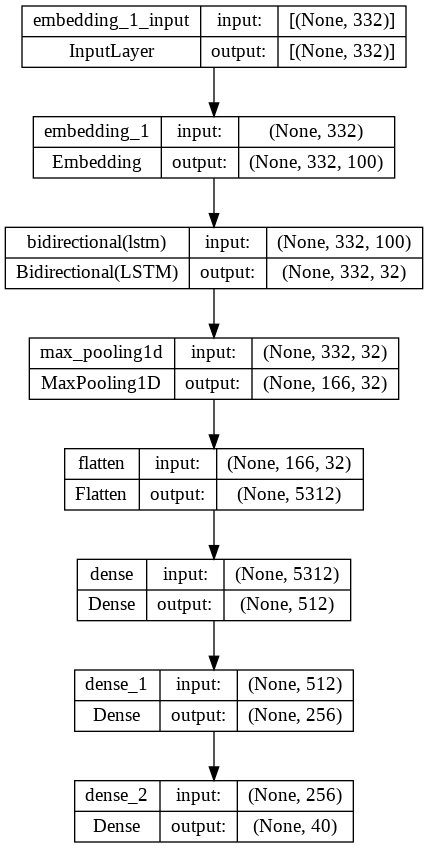

In [39]:
Bi_LSTM_model = build_biLstm_model()
plot_model(Bi_LSTM_model,show_shapes=True)

In [40]:
bi_Lstm_history = Bi_LSTM_model.fit(x_train2,y_train2,validation_data = (x_test2, y_test2),epochs=18,batch_size=64,shuffle=True)
ypred2 = Bi_LSTM_model.predict(x_test2)

Epoch 1/18
458/458 [==============================] - 198s 423ms/step - loss: 46.2873 - accuracy: 0.2120 - val_loss: 32.7464 - val_accuracy: 0.3696
Epoch 2/18
458/458 [==============================] - 189s 413ms/step - loss: 23.2943 - accuracy: 0.4662 - val_loss: 15.5420 - val_accuracy: 0.5648
Epoch 3/18
458/458 [==============================] - 188s 410ms/step - loss: 10.6364 - accuracy: 0.6027 - val_loss: 6.8297 - val_accuracy: 0.6519
Epoch 4/18
458/458 [==============================] - 186s 406ms/step - loss: 4.9675 - accuracy: 0.6694 - val_loss: 3.7166 - val_accuracy: 0.6935
Epoch 5/18
458/458 [==============================] - 196s 427ms/step - loss: 3.0834 - accuracy: 0.7173 - val_loss: 2.5818 - val_accuracy: 0.7367
Epoch 6/18
458/458 [==============================] - 189s 413ms/step - loss: 2.2867 - accuracy: 0.7520 - val_loss: 2.0319 - val_accuracy: 0.7601
Epoch 7/18
458/458 [==============================] - 194s 425ms/step - loss: 1.8687 - accuracy: 0.7817 - val_loss: 1.6

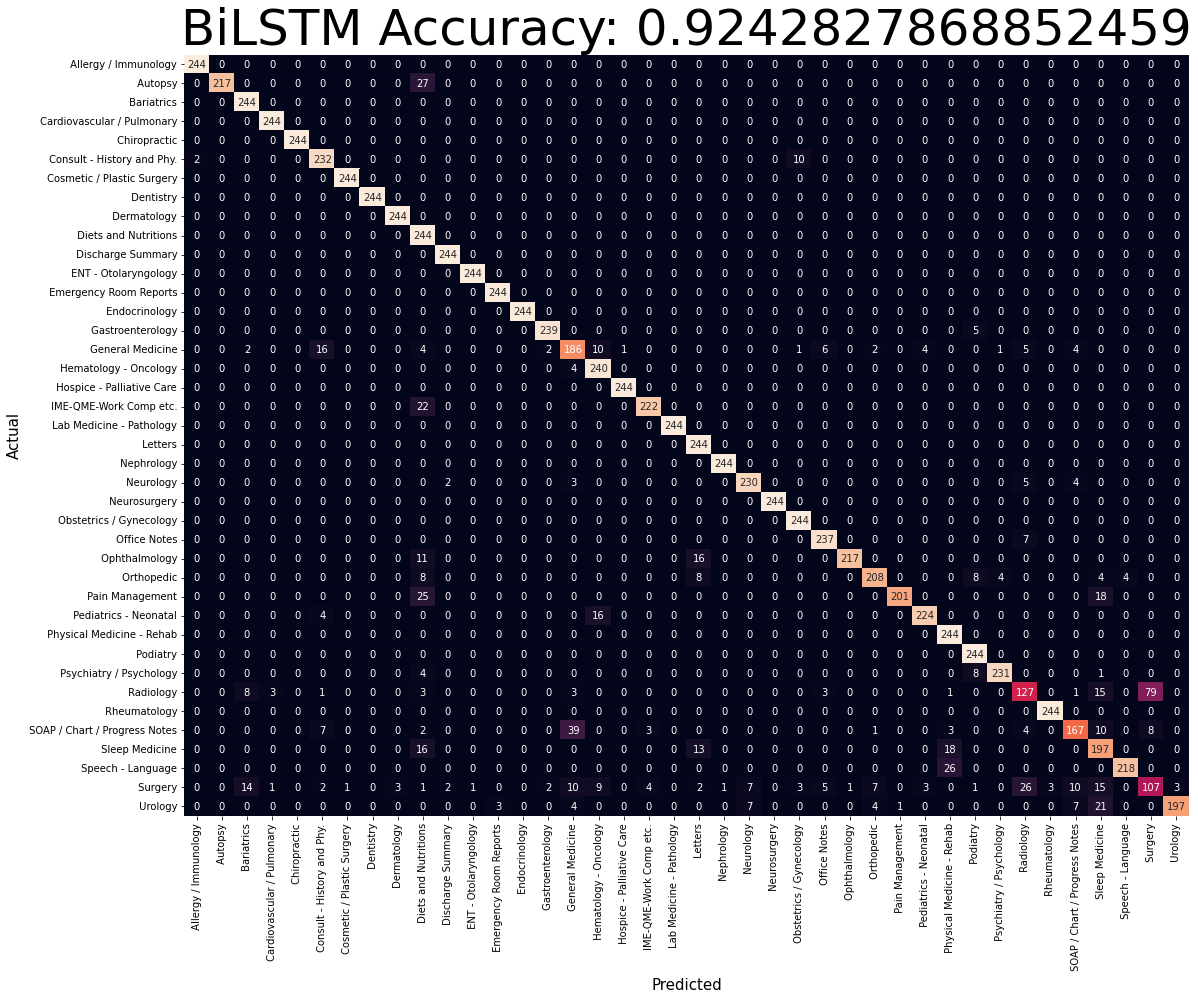

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

biLstm_accuracy = accuracy_score(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))

ann_cn = confusion_matrix(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(ann_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("BiLSTM Accuracy: {}".format(biLstm_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [42]:
# Getting the model history to analyse
train_loss = bi_Lstm_history.history['loss']
train_acc = bi_Lstm_history.history['accuracy']

val_loss = bi_Lstm_history.history['val_loss']
val_acc = bi_Lstm_history.history['val_accuracy']

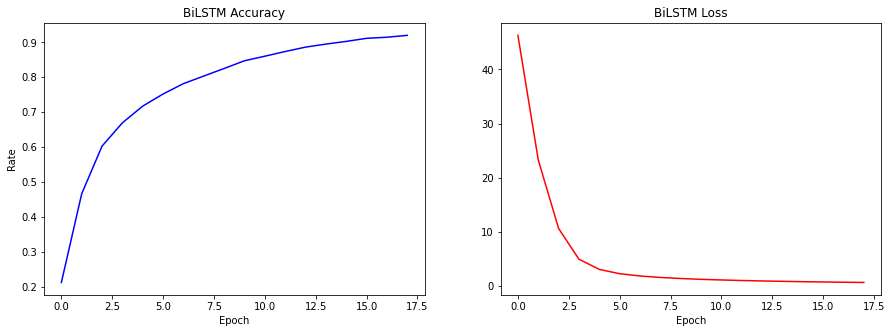

In [43]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(bi_Lstm_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(bi_Lstm_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("BiLSTM Accuracy")
axe1[1].title.set_text("BiLSTM Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

Text(0.5, 1.0, 'Training and Validation Loss')

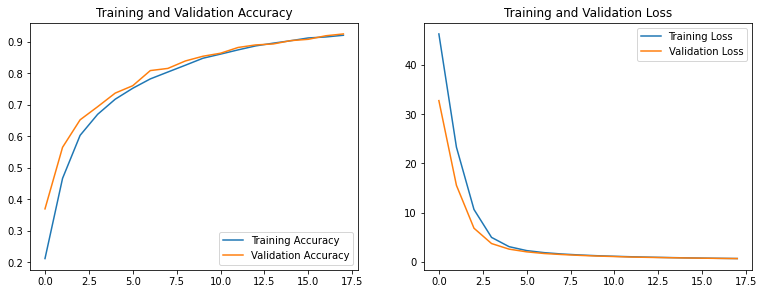

In [45]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
plt.plot(range(18), train_acc, label = 'Training Accuracy')
plt.plot(range(18), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(18), train_loss, label = 'Training Loss')
plt.plot(range(18), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [46]:
y_t2=y_test2.argmax(axis=-1)
y_pre2=ypred2.argmax(axis=-1)

In [47]:
target_names=[' Allergy / Immunology', ' Autopsy', ' Bariatrics',
 ' Cardiovascular / Pulmonary', ' Chiropractic',
 ' Consult - History and Phy.', ' Cosmetic / Plastic Surgery', ' Dentistry',
 ' Dermatology','Diets and Nutritions', ' Discharge Summary', ' ENT - Otolaryngology',
 ' Emergency Room Reports', ' Endocrinology', ' Gastroenterology',
 ' General Medicine', ' Hematology - Oncology', ' Hospice - Palliative Care',
 ' IME-QME-Work Comp etc.', ' Lab Medicine - Pathology', ' Letters',
 ' Nephrology', ' Neurology', ' Neurosurgery', ' Obstetrics / Gynecology',
 ' Office Notes', ' Ophthalmology', ' Orthopedic', ' Pain Management',
 ' Pediatrics - Neonatal', ' Physical Medicine - Rehab', ' Podiatry',
 ' Psychiatry / Psychology', ' Radiology', ' Rheumatology',
 ' SOAP / Chart / Progress Notes', ' Sleep Medicine', ' Speech - Language',
 ' Surgery', ' Urology']

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_pre2,target_names=target_names))

                                precision    recall  f1-score   support

          Allergy / Immunology       0.99      1.00      1.00       244
                       Autopsy       1.00      0.89      0.94       244
                    Bariatrics       0.91      1.00      0.95       244
    Cardiovascular / Pulmonary       0.98      1.00      0.99       244
                  Chiropractic       1.00      1.00      1.00       244
    Consult - History and Phy.       0.89      0.95      0.92       244
    Cosmetic / Plastic Surgery       1.00      1.00      1.00       244
                     Dentistry       1.00      1.00      1.00       244
                   Dermatology       0.99      1.00      0.99       244
          Diets and Nutritions       0.66      1.00      0.80       244
             Discharge Summary       0.98      1.00      0.99       244
          ENT - Otolaryngology       1.00      1.00      1.00       244
        Emergency Room Reports       0.99      1.00      0.99  

In [49]:
from sklearn.metrics import f1_score
f1_score(y_t2, y_pre2,average='micro')

0.924282786885246

In [50]:
from sklearn.metrics import recall_score
recall_score(y_t2, y_pre2, average='micro')

0.9242827868852459

In [51]:
from sklearn.metrics import precision_score
precision_score(y_t2, y_pre2, average='micro')

0.9242827868852459

In [52]:
def bilstm_predict(text):
    puretext = leadMyWord(text)
    onehottext = one_hot(puretext,MAX_FEATURES)
    text_pad = pad_sequences([onehottext],maxlen=maxTextLen,padding='post')
    predicted = Bi_LSTM_model.predict(text_pad)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]

    
for _ in range(10):
    randint = np.random.randint(len(data))
    text = data.transcription[randint]  
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("Actual Category: {}".format(data.medical_specialty[randint]))
    print("BiLSTM Predicted Category: {}".format(bilstm_predict(text)[0]))
    print("*"*50)

  Text
--------
left testicular torsion  postoperative left testicular left testicular left scrotal left patient vancomycin zosyn levaquin patient left testicular scrotal patient scrotal testicle patient testicle scrotal patient patient patient necrotic skin left hemiscrotum pu left hemiscrotum testicle pu pu pu left testicle left testicle scrotal wall necrotic tissue left hemiscrotum tissue left left hemiscrotum patient torsed testicle testicle hemiscrotum testicle scrotal wall testicle pu hemiscrotum skin pu left skin patient patient
--------------------
Actual Category:  Urology
1/1 [==============================] - 2s 2s/step
BiLSTM Predicted Category:  Urology
**************************************************
  Text
--------
abdominal chronic abdominal epigastric area epigastric antacid patient h pylorus omeprazole patient bowel blood rectum nsaid ethanol omeprazole tobacco patient oral blood patient skin head tympanic membrane oral mucosa carotid bruits thyroid nonpalpable jugu

In [53]:
#Let me try it too
def predict_print(text):
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("Bi LSTM Predicted Category: {}".format(bilstm_predict(text)[0]))
    print("*"*50)
myText = "femoroacetabular femoroacetabular impingement  operations performed left left femoral neck left patient bilateral extremity left line left leg hibiclens alcohol portal anterolateral portal femoral neck portal articular surface anterior lip articular cartilage acetabular articular cartilage anterior lip acetabular osteoplasty labrum smc labrum ligamentum teres femoral artery acetabulum posterior leg left anterolateral head and neck junction femoral neck femoral neck patient ropivacaine ropivacaine"
predict_print(myText)
myText = "nonsmallcell carcinoma left lymphoma nonsmallcell carcinoma left lymphoma left muscle left lymph node intercostal nerve block left lobe carcinoma patient lymphoma lymph node lymphoma left lobe fineneedle nonsmallcell carcinoma lung patient left muscle serratus latissimus muscle intercostal space tuffier retractor pulmonary ligament lymph node parietal pleural hilum lymph node pulmonary artery left pulmonary vein left bronchus patient bronchus posterior trunk pulmonary artery posterior left lingular left left lobe tube intercostal marcaine marcaine serratus latissimus muscle retracted back blake subcutaneous tissue fat skin patient" # Key Broken
predict_print(myText)

  Text
--------
femoroacetabular femoroacetabular impingement  operations performed left left femoral neck left patient bilateral extremity left line left leg hibiclens alcohol portal anterolateral portal femoral neck portal articular surface anterior lip articular cartilage acetabular articular cartilage anterior lip acetabular osteoplasty labrum smc labrum ligamentum teres femoral artery acetabulum posterior leg left anterolateral head and neck junction femoral neck femoral neck patient ropivacaine ropivacaine
--------------------
1/1 [==============================] - 0s 37ms/step
Bi LSTM Predicted Category:  Surgery
**************************************************
  Text
--------
nonsmallcell carcinoma left lymphoma nonsmallcell carcinoma left lymphoma left muscle left lymph node intercostal nerve block left lobe carcinoma patient lymphoma lymph node lymphoma left lobe fineneedle nonsmallcell carcinoma lung patient left muscle serratus latissimus muscle intercostal space tuffier 